In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
# Url plus your API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e65cf662f02f0b5b554ea5aaabadca98


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marmande
Processing Record 2 of Set 1 | grindavik
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | emporia
Processing Record 5 of Set 1 | tuensang
Processing Record 6 of Set 1 | tuim
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | salina cruz
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | tiznit
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 |

Processing Record 34 of Set 4 | imeni poliny osipenko
Processing Record 35 of Set 4 | umarkot
Processing Record 36 of Set 4 | eenhana
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | solsvik
City not found. Skipping...
Processing Record 39 of Set 4 | bestobe
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | kuusamo
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | bagdarin
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | burnie
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | awbari
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | morristown
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | peniche
Processing Record 4 of Set 5 | lubango
Processing Record 5 of Set 5 | marystown
Processing Record 6 of Set 5 | tawnat
City not found. Sk

Processing Record 26 of Set 8 | havre-saint-pierre
Processing Record 27 of Set 8 | bardiyah
Processing Record 28 of Set 8 | saint-augustin
Processing Record 29 of Set 8 | iquique
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | rodez
Processing Record 32 of Set 8 | goba
Processing Record 33 of Set 8 | sistranda
Processing Record 34 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 35 of Set 8 | malpe
Processing Record 36 of Set 8 | boli
Processing Record 37 of Set 8 | griffith
Processing Record 38 of Set 8 | koupela
Processing Record 39 of Set 8 | swadlincote
Processing Record 40 of Set 8 | bengkulu
Processing Record 41 of Set 8 | shahr-e kord
Processing Record 42 of Set 8 | santa maria
Processing Record 43 of Set 8 | xichang
Processing Record 44 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | orahovac
Processing Record 47 of Set 8 | sabzevar
Processing Record 48 of Set 8 

Processing Record 14 of Set 12 | drawsko pomorskie
Processing Record 15 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 16 of Set 12 | pasewalk
Processing Record 17 of Set 12 | burica
City not found. Skipping...
Processing Record 18 of Set 12 | rudsar
Processing Record 19 of Set 12 | mehamn
Processing Record 20 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 21 of Set 12 | kodinar
Processing Record 22 of Set 12 | ivdel
Processing Record 23 of Set 12 | yarmouth
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | lazaro cardenas
Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | bonthe
Processing Record 28 of Set 12 | narsaq
Processing Record 29 of Set 12 | mercedes
Processing Record 30 of Set 12 | souillac
Processing Record 31 of Set 12 | danjiangkou
Processing Record 32 of Set 12 | rocha
Processing Record 33 of Set 12 | waidhofen
Processing Record 34 of Set 12 | louis trichardt
Processing Record 35 of

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marmande,44.5000,0.1667,76.75,65,1,5.77,FR,2022-07-21 21:13:50
1,Grindavik,63.8424,-22.4338,52.27,93,100,5.75,IS,2022-07-21 21:13:51
2,Codrington,-38.2667,141.9667,47.46,83,73,11.83,AU,2022-07-21 21:09:07
3,Emporia,38.4039,-96.1817,100.60,23,0,0.00,US,2022-07-21 21:10:21
4,Tuensang,26.2833,94.8333,71.26,99,100,1.39,IN,2022-07-21 21:13:52
5,Tuim,54.3417,89.9261,52.23,90,84,6.51,RU,2022-07-21 21:13:52
6,Coahuayana,18.7333,-103.6833,91.17,63,82,6.96,MX,2022-07-21 21:13:53
7,Tuktoyaktuk,69.4541,-133.0374,55.40,94,100,8.05,CA,2022-07-21 21:13:53
8,Ponta Do Sol,32.6667,-17.1000,72.72,79,3,7.72,PT,2022-07-21 21:10:02
9,Salina Cruz,16.1667,-95.2000,85.84,67,90,8.10,MX,2022-07-21 21:10:03


In [19]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marmande,FR,2022-07-21 21:13:50,44.5000,0.1667,76.75,65,1,5.77
1,Grindavik,IS,2022-07-21 21:13:51,63.8424,-22.4338,52.27,93,100,5.75
2,Codrington,AU,2022-07-21 21:09:07,-38.2667,141.9667,47.46,83,73,11.83
3,Emporia,US,2022-07-21 21:10:21,38.4039,-96.1817,100.60,23,0,0.00
4,Tuensang,IN,2022-07-21 21:13:52,26.2833,94.8333,71.26,99,100,1.39
5,Tuim,RU,2022-07-21 21:13:52,54.3417,89.9261,52.23,90,84,6.51
6,Coahuayana,MX,2022-07-21 21:13:53,18.7333,-103.6833,91.17,63,82,6.96
7,Tuktoyaktuk,CA,2022-07-21 21:13:53,69.4541,-133.0374,55.40,94,100,8.05
8,Ponta Do Sol,PT,2022-07-21 21:10:02,32.6667,-17.1000,72.72,79,3,7.72
9,Salina Cruz,MX,2022-07-21 21:10:03,16.1667,-95.2000,85.84,67,90,8.10


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marmande,FR,2022-07-21 21:13:50,44.5000,0.1667,76.75,65,1,5.77
1,Grindavik,IS,2022-07-21 21:13:51,63.8424,-22.4338,52.27,93,100,5.75
2,Codrington,AU,2022-07-21 21:09:07,-38.2667,141.9667,47.46,83,73,11.83
3,Emporia,US,2022-07-21 21:10:21,38.4039,-96.1817,100.60,23,0,0.00
4,Tuensang,IN,2022-07-21 21:13:52,26.2833,94.8333,71.26,99,100,1.39
...,...,...,...,...,...,...,...,...,...
555,Rodnykove,UA,2022-07-21 21:29:22,45.0430,33.9541,63.12,64,0,6.53
556,Jerusalem,IL,2022-07-21 21:29:22,31.7690,35.2163,71.80,91,1,3.00
557,Varkaus,FI,2022-07-21 21:29:23,62.3153,27.8730,66.31,67,94,5.28
558,Leiva,CO,2022-07-21 21:29:23,1.9339,-77.3025,73.02,68,72,4.70


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

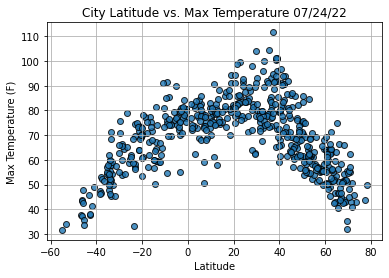

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

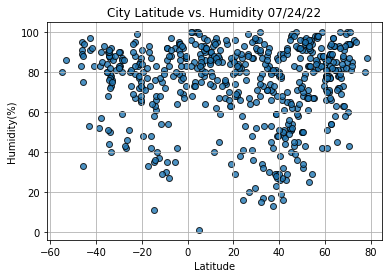

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

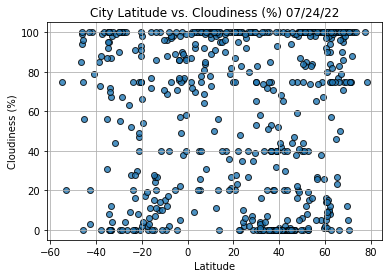

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

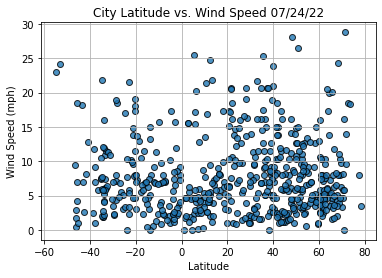

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()